In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta
import os
import datetime
import json
import seaborn as sns
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from monday import get_data,Strategy
sns.set_style("darkgrid")

In [3]:
df_dict = {}
candidate = ['BTC']
# candidate = ['SOL','ETH']
for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 98.01 %
MDD: 33.61 %
MDD Duration 147 days 03:00:00
worst trade: -15.33 %
2023-06-18 00:00:00 ~ 2023-06-24 00:00:00
avg holding days: 4.41 days
--------------------------------------------
PF: 2.00
Sharpe Ratio: 1.68
Calmar Ratio: 2.16
Sortino Ratio: 2.46
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 1.43 %
Total Time Exposure : 83.80 %
Total Trades: 136
Win Rate: 49.63 %
--------------------------------------------
PF * Win Rate: 0.994


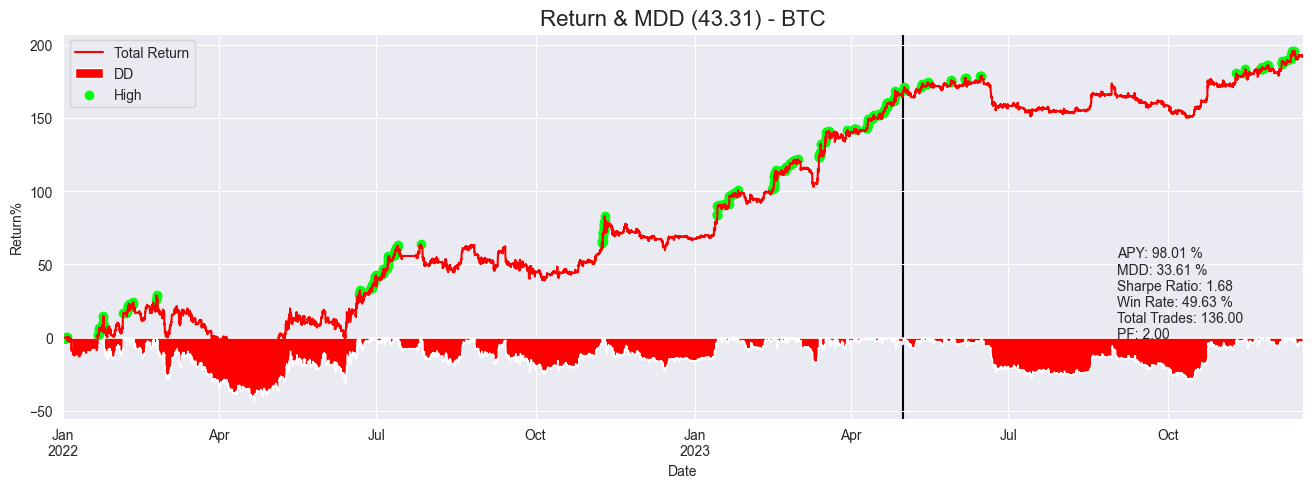

In [4]:
start = '2022-01-01'
sep = ''
end = ''
# new version
# 到禮拜五:{'vol_threshold': 0.05, 'ret_threshold': 0.3}
# 到禮拜一:{'vol_threshold': 0.01, 'ret_threshold': 0.1}
# old version
# 到禮拜五:{'vol_threshold': 0.3, 'ret_threshold': 0.15}

side = 'both'
params = {'vol_threshold': 0.3, 'ret_threshold': 0.15}
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
value = analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<Axes: >

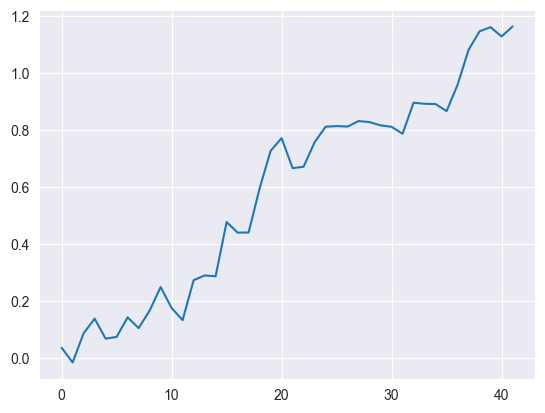

In [7]:
trades['Return'].cumsum().plot()

In [5]:
start= '2022-01-01'
end ='2023-12-01'

params={
   'vol_threshold': [0/48, 0.5/48, 0.05/48],
   'ret_threshold' : [0.1, 0.5, 0.05],
#    'sl' : [100, 101, 20],
#    'window': [12,96,4]
    }
    
config = {'freq':'1h','fee': 0.0003}
symbol_list = ['BTC']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    df_dict=df_dict,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

======================= BTC BOTH Optimize Test =======================
Optimization trails: 80


100%|██████████| 80/80 [03:31<00:00,  2.65s/it]


Optimization time: 211.69 sec
---------- BTC BOTH ----------
{'vol_threshold': 0.00625, 'ret_threshold': 0.15000000000000002}
APY: 94.48 %
MDD: 33.61 %
MDD Duration 147 days 03:00:00
worst trade: -15.33 %
2023-06-18 00:00:00 ~ 2023-06-24 00:00:00
avg holding days: 4.45 days
--------------------------------------------
PF: 1.98
Sharpe Ratio: 1.64
Calmar Ratio: 2.12
Sortino Ratio: 2.41
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 1.40 %
Total Time Exposure : 83.86 %
Total Trades: 132
Win Rate: 49.62 %
--------------------------------------------
PF * Win Rate: 0.981


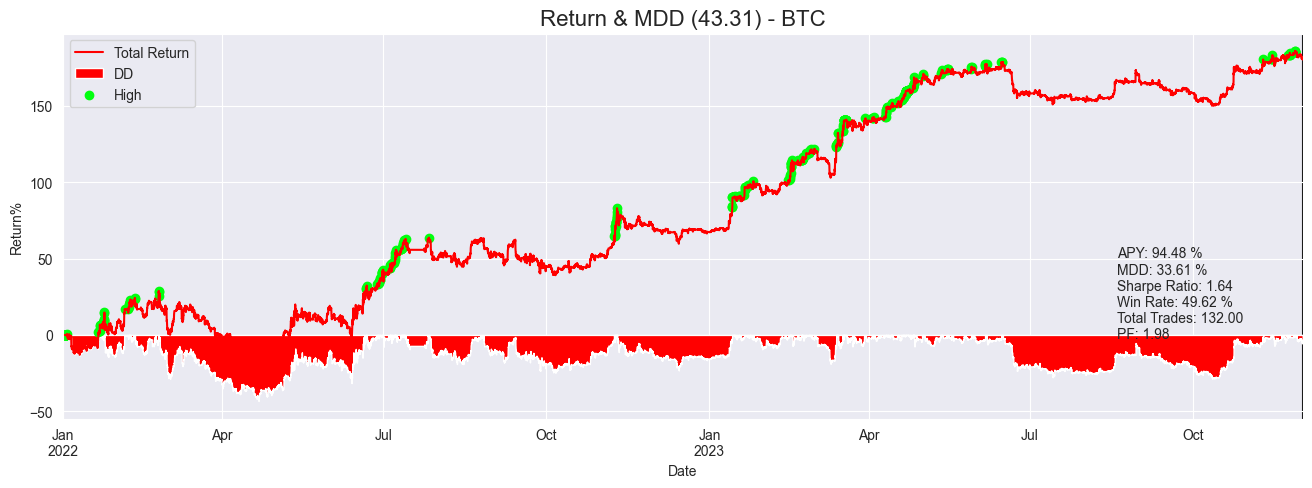

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |      0.56 | 3990.87 | -4091.84 |       0.98 |   50    |         18 |
| 2022-06    |     43.09 | 7271.96 | -3097.04 |       2.35 |   52.63 |         19 |
| 2022-09    |      4.12 | 3955.96 | -3544.06 |       1.12 |   35.29 |         17 |
| 2022-12    |     22.6  | 3662.37 | -1402.39 |       2.61 |   62.5  |         16 |
| 2023-03    |     72.6  | 9750.77 | -2490.76 |       3.91 |   52.63 |         19 |
| 2023-06    |     18.2  | 3688.71 | -1868.59 |       1.97 |   73.33 |         15 |
| 2023-09    |      0.42 | 1363.04 | -1320.74 |       1.03 |   20    |         15 |
| 2023-12    |     22.25 | 3442.64 | -1217.81 |       2.83 |   46.15 |         13 |
+------------+-----------+---------+----------+------------+---------+------------+


In [6]:
all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)